In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.spatial import distance

In [174]:
data = pd.read_csv('../../../../STUDY/[Skillbox] Профессия‌ ‌Data‌ ‌Scientist‌ (2020)/1 Data Scientist. ML. Начальный уровень/3.10_non_linear.csv')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head(5)

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


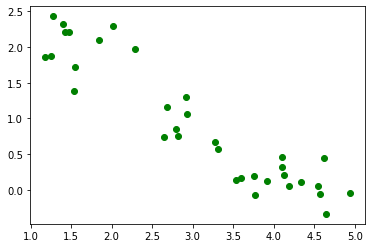

In [175]:
plt.scatter(data.x_train, data.y_train, c='g')
plt.show()

In [176]:
def gradient(X, y, w) -> np.array:
    #кол-во примеров в обучающей выборке
    n = X.shape[0]
    #прогноз
    y_pred = X.dot(w.T)
    #вычисляем ошибку
    error = y-y_pred
    grad = np.multiply(X, error).sum(axis=0)*2.0*(-1.0) / n #посчитали частные производные - перев. треугольник
    return grad, error

def eval_w_next(X, y, eta, w_current, alpha):
    #вычислить градиент
    grad, error = gradient(X, y, w_current)
    #шаг спуска
    w_next = w_current - eta*grad+alpha*w_current
    #условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad, alpha)

def gradient_descent(X, y, eta=0.01, epsilon=0.001, alpha=0):        #это градиент для любого количества фичей
    m = X.shape[1] #число фичей - размерность градиента
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad, alpha = eval_w_next(X, y, eta, w, alpha)
    step=0
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad, alpha = eval_w_next(X, y, eta, w, alpha)
        step+=1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    print('last step: %s' % step)
    return(w)


In [177]:
X = data.x_train.values.reshape(-1, 1)  #строк по номеру последнего жлемента(сколько получится) а столбец - 1
n = X.shape[0]
#добавим тривиальный признак 
X = np.hstack([
    np.ones(n).reshape(-1, 1),
    X
])  
X.shape #стало два столбца т.к. мы при приделали новый столбец из единиц

(34, 2)

Из-за рандома алгоритм сходится к оптимальной точке за разное количество шагов

In [178]:
w = gradient_descent(X, data.y_train.values.reshape(-1, 1), eta=0.008, epsilon=0.001, alpha=0.0000001)  #сохраняем наши веса с минимальной ошибкой для предсказаний
#регуляризация делает наш график более естественным - плавным, уменьшая коэффициенты 

step 100 |w-w_next|=0.00388, grad=[-0.46633592  0.13471747]
step 200 |w-w_next|=0.00320, grad=[-0.38375711  0.11086209]
step 300 |w-w_next|=0.00263, grad=[-0.3158002   0.09123069]
step 400 |w-w_next|=0.00216, grad=[-0.25987615  0.07507534]
step 500 |w-w_next|=0.00178, grad=[-0.21385434  0.06178056]
step 600 |w-w_next|=0.00147, grad=[-0.17598143  0.05083983]
step 700 |w-w_next|=0.00121, grad=[-0.14481452  0.04183633]
last step: 797


In [179]:
support = np.linspace(X.min(), X.max(), num=100)
#делаем предикт - считаем предсказания модели в каждой точке выборки в виде y=X*w
y_hat = np.hstack([
    np.ones(support.size).reshape(-1, 1),
    support.reshape(-1, 1)
]).dot(w.T) #мы добавляем единицы в столбец, чтобы можно было умножить 1 на вес и получить тем самым свободный член

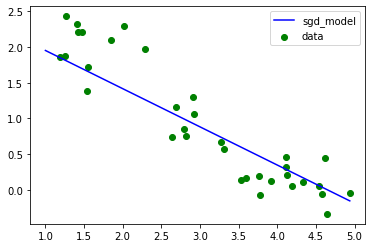

In [180]:
plt.plot(support, y_hat, 'b', label='sgd_model')
plt.scatter(data.x_train, data.y_train, c='g', label='data')
plt.legend()
plt.show()